<a href="https://colab.research.google.com/github/sanskrutin19/AIEthics-Experiments/blob/main/exp-6ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

customer = pd.read_csv("/content/Customer Churn.csv")
customer.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [5]:
X = customer.drop("Churn", axis=1) # Independent variables
y = customer.Churn # Dependent variable

In [6]:
# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a machine learning model (example: Random Forest)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
from sklearn.metrics import classification_report

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       814
           1       0.79      0.82      0.80       131

    accuracy                           0.94       945
   macro avg       0.88      0.89      0.89       945
weighted avg       0.95      0.94      0.95       945



In [8]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)


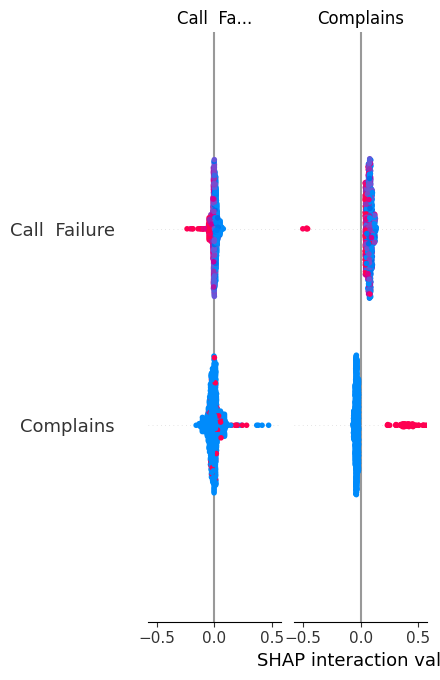

In [9]:
# Summarize feature importances
shap.summary_plot(shap_values, X_test)

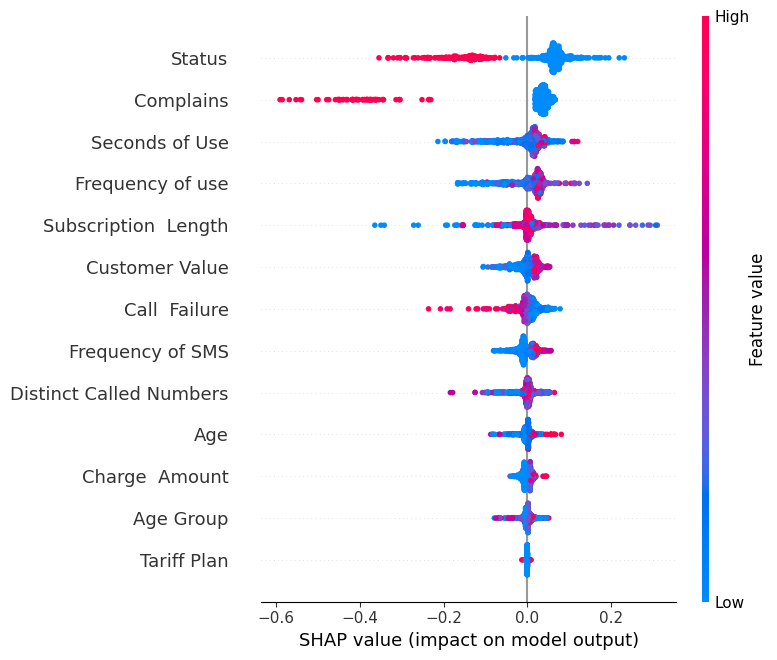

In [10]:
shap.summary_plot(shap_values[:, :, 0], X_test)

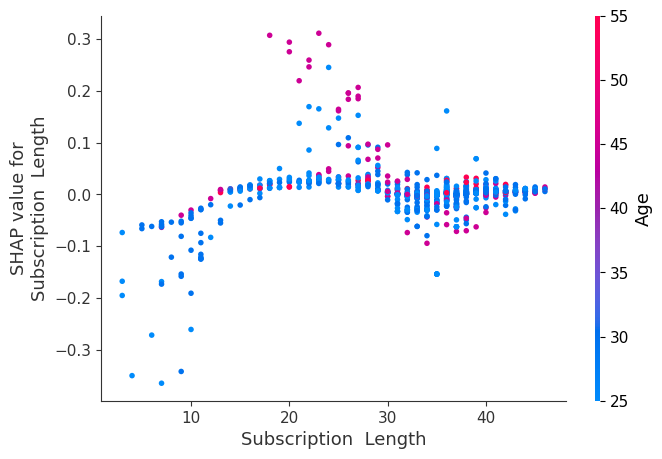

In [11]:
shap.dependence_plot("Subscription  Length", shap_values[:,:,0], X_test,interaction_index="Age")

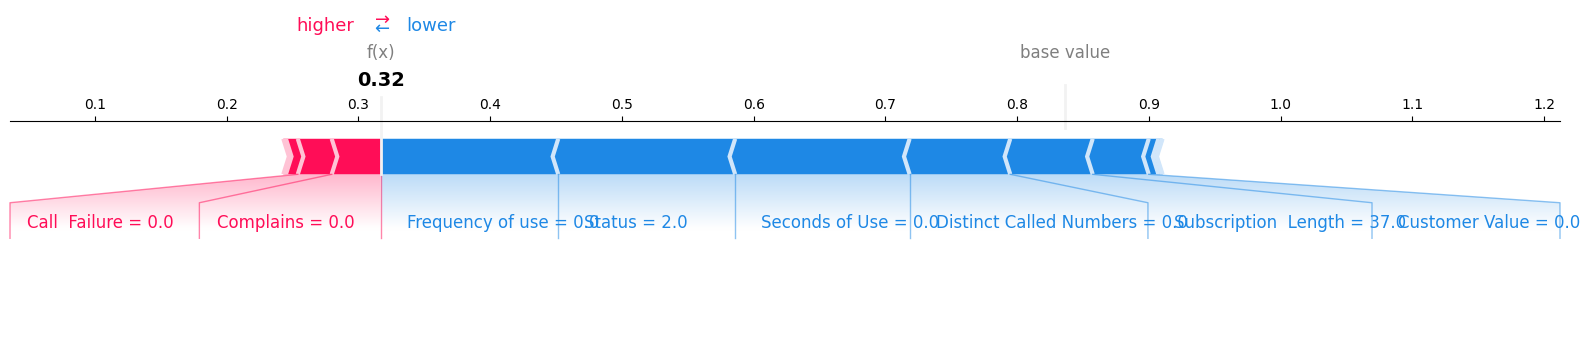

In [12]:
# Plot SHAP interaction values for the first instance (X_test.iloc[0, :]) for class 0
shap.plots.force(explainer.expected_value[0], shap_values[0,:,0], X_test.iloc[0, :], matplotlib = True)

In [13]:
clf.predict(X_test.iloc[6, :].values.reshape(1, -1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [14]:
y_test.iloc[6]

np.int64(1)

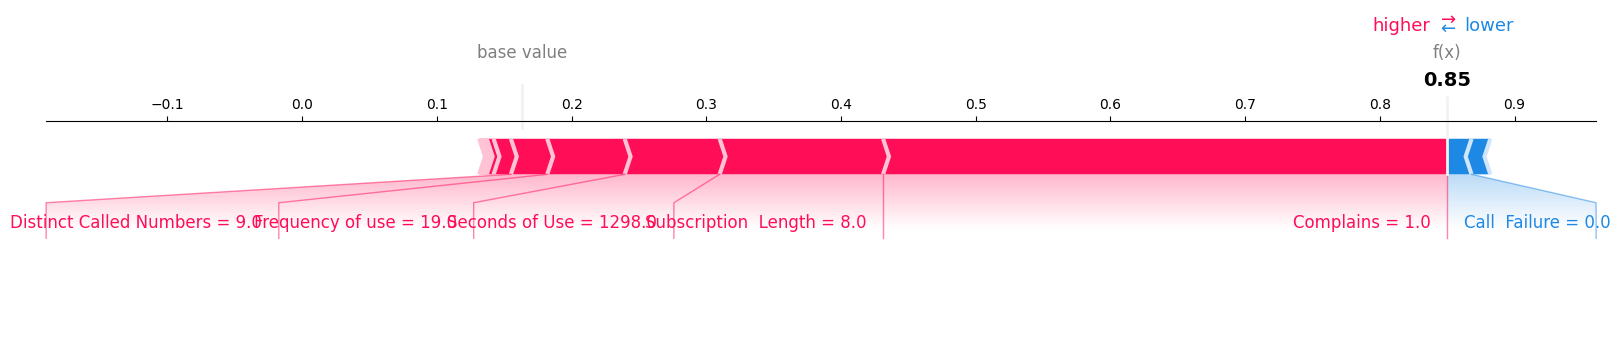

In [15]:
shap.plots.force(explainer.expected_value[1], shap_values[6, :, 1], X_test.iloc[6, :], matplotlib = True)

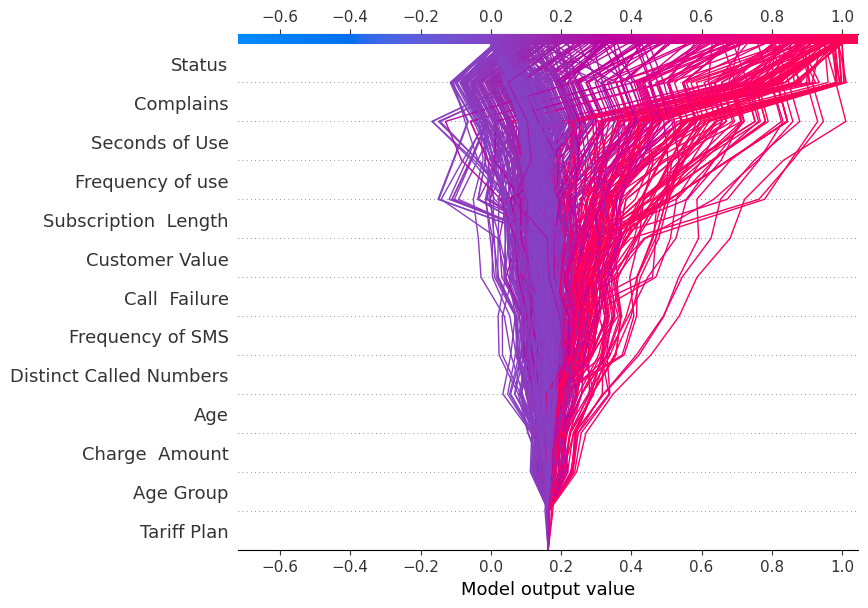

In [16]:
shap.decision_plot(explainer.expected_value[1], shap_values[:, :, 1], X_test.columns)

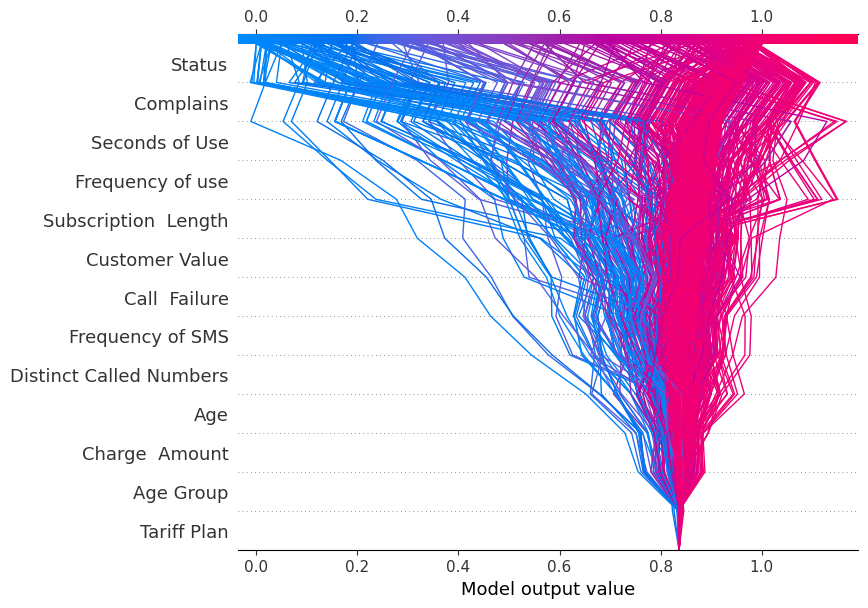

In [17]:
shap.decision_plot(explainer.expected_value[0], shap_values[:, :, 0], X_test.columns)